<a href="https://colab.research.google.com/github/mzucali/didactics/blob/main/ZinggFlinnPRG_StatsPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*ZINGG FLINN PGR plots of Eigenvalues*
- versione 1 @mzucali 9 novembre 2023

In [13]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import math
from pandas import read_csv, read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import io

matplotlib: 3.7.1
pandas: 1.5.3
seaborn: 0.12.2


In [33]:
# load and read summary file from EMPA
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Eifel12_FlinnZingg.xlsx to Eifel12_FlinnZingg.xlsx
User uploaded file "Eifel12_FlinnZingg.xlsx" with length 10427 bytes


In [34]:
pippo = read_excel(fn)

In [36]:
pippo.head()


,dataset,N,S1(eigenV),S2,S3,S1/S2,S2/S3,C,k,S2/S1,S3/S2,P (S1-S2),G (2*(S2-S3)),R (3*S3),cyl (P+G),test (P+G+R=1),Unnamed: 16,Unnamed: 17
0,e1ss,62,0.5843,0.4012,0.0144,1.456381,27.861111,40.576389,0.052273,0.686634,0.035892,0.1831,0.7736,0.0432,0.9567,0.9999,0.163275,1.444998
1,e2ss,62,0.7890,0.1100,0.1000,7.172727,1.100000,7.890000,6.520661,0.139417,0.909091,0.6790,0.0200,0.3000,0.6990,0.9990,0.855684,0.041393
2,e2ss,62,0.9000,0.0600,0.0400,15.000000,1.500000,22.500000,10.000000,0.066667,0.666667,0.8400,0.0400,0.1200,0.8800,1.0000,1.176091,0.176091


FLINN PLOT

<ipython-input-37-71066c2ae5b1>:1: UserWarning:


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.



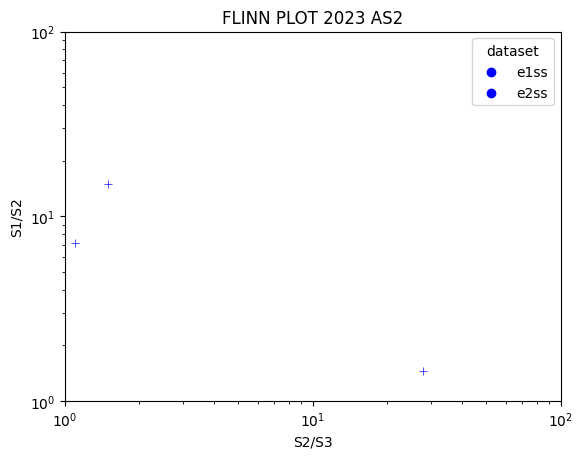

In [37]:
sns.scatterplot(data=pippo, x="S2/S3", y="S1/S2", hue="dataset", marker="+", palette=['blue']).set_title('FLINN PLOT 2023 AS2')
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^

# control x and y limits
plt.ylim(10**0, 10**2)
plt.xlim(10**0, 10**2)
#plt.ylim(0,30)
#plt.xlim(0,30)
plt.xscale('log')
plt.yscale('log')
plt.show()

ZINGG PLOT

<ipython-input-42-8f6871544ba0>:1: UserWarning:


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.



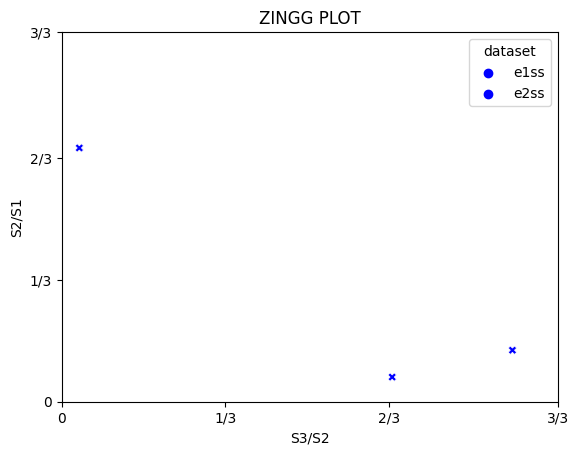

In [42]:
sns.scatterplot(data=pippo, x="S3/S2", y="S2/S1", hue="dataset", marker="X", palette=['blue']).set_title('ZINGG PLOT')
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^

# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1)
#plt.set_yticks(range(len(data)-5))
#plt.xscale('log')
#plt.yscale('log')
# specify positions of ticks on x-axis and y-axis
plt.xticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.yticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.show()

PGR VOLLMER PLOT

In [40]:
import plotly.express as px

In [43]:
fig = px.scatter_ternary(pippo, a="P (S1-S2)", b="G (2*(S2-S3))", c="R (3*S3)")
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI dei vertici a,b,c^^^^^
fig.show()